# Підготовка та аналіз даних 
## Лабораторна робота №6
### Застосування numpy
### ФБ-21 Каюн Вероніка


In [68]:
import matplotlib.pyplot as plt
import numpy as np
print("Setup Complete")

Setup Complete


Завдання 1
1. Згенеруйте двовимірні дані (x, y) за допомогою numpy.random : бажано, щоб розподіл
точок був навколо деякої наперед заданої прямої (y = kx + b) для подальшого аналізу
результатів.

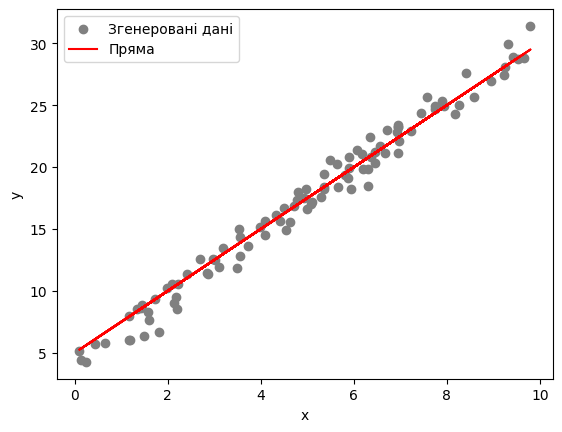

In [69]:
k = 2.5
b = 5
n = 100
x = np.random.uniform(0, 10, n)
y = k * x + b + np.random.normal(0, 1, n)

plt.scatter(x, y, color='gray', label='Згенеровані дані')
plt.plot(x, k*x+b, color='red', label='Пряма')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()


2. Напишіть функцію, яка реалізує метод найменших квадратів для пошуку оптимальних оцінок k^ та b^.

In [70]:
def least_squares(x, y):
    mean_x = np.mean(x)
    mean_y = np.mean(y)

    k = (np.mean(x*y) - mean_y * mean_x) / (np.mean(x*x) - mean_x ** 2)
    b = mean_y - k * mean_x

    return (k, b)

k_, b_ = least_squares(x, y)
print("Оцінка k:", k_)
print("Оцінка b:", b_)

Оцінка k: 2.634751148276863
Оцінка b: 4.198919019458124


3. Порівняйте знайдені параметри з оцінкою np.polyfit(x,y,1) (оцінка полінома
степеню 1 методом найменших квадратів), та з початковими параметрами прямої (якщо
такі є).

In [71]:
k_polyfit, b_polyfit = np.polyfit(x, y, 1)

print(f"Початкові параметри: k = {k}, b = {b}")
print(f"Оцінка параметрів за методом найменших квадратів: k = {k_}, b = {b_}")
print(f"Оцінка параметрів з np.polyfit: k = {k_polyfit}, b = {b_polyfit}")

Початкові параметри: k = 2.5, b = 5
Оцінка параметрів за методом найменших квадратів: k = 2.634751148276863, b = 4.198919019458124
Оцінка параметрів з np.polyfit: k = 2.63475114827686, b = 4.198919019458129


4. Відобразіть на графіку знайдені оцінки лінії регресії (вашої та numpy). Якщо ви
генерували вхідні дані навколо лінії, відобразіть також її.

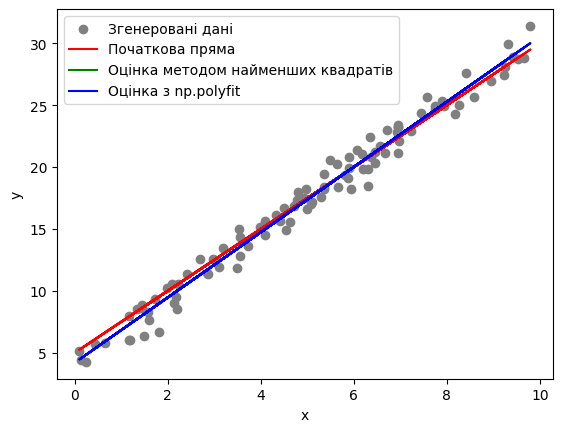

In [72]:
plt.scatter(x, y, color='gray', label='Згенеровані дані')
plt.plot(x, k*x+b, color='red', label='Початкова пряма')
plt.plot(x, k_*x+b_, color='green', label='Оцінка методом найменших квадратів')
plt.plot(x, k_polyfit*x+b_polyfit, color='blue', label='Оцінка з np.polyfit')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

Завдання 2
1. Напишіть функцію, яка реалізує метод градієнтного спуску для пошуку оптимальних
оцінок k^ та b^. Визначіть оптимальні вхідні параметри: learning_rate, n_iter

In [73]:
def gradient_descent(x, y, learning_rate, n_iter):
    # Ініціалізуємо параметри k та b
    k_d = 0
    b_d = 0
    loss_values = []
    
    for _ in range(n_iter):
        # Робимо прогноз за поточними параметрами
        y_pred = k_d * x + b_d
        loss_values.append(np.mean((y - y_pred)**2))
        # Обчислюємо градієнти
        grad_k = (-2 / len(x)) * np.sum(x * (y - y_pred))
        grad_b = (-2 / len(x)) * np.sum(y - y_pred)
        
        # Оновлюємо параметри за допомогою градієнтного спуску
        k_d -= learning_rate * grad_k
        b_d -= learning_rate * grad_b
        
    return k_d, b_d,  loss_values

learning_rate = 0.01
n_iter = 1000
k_d, b_d, loss_values = gradient_descent(x, y, learning_rate, n_iter)
print(f"Оцінка параметрів за методом градієнтного спуску: k = {k_d}, b = {b_d}")

Оцінка параметрів за методом градієнтного спуску: k = 2.644297797454922, b = 4.139647753728583


2. Додайте отриману лінію регресії на загальний графік

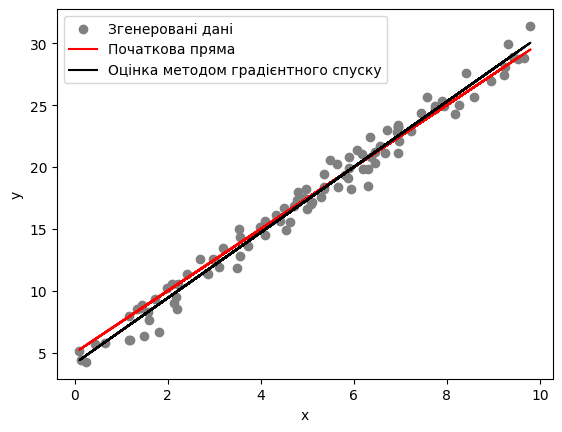

In [74]:
plt.scatter(x, y, color='gray', label='Згенеровані дані')
plt.plot(x, k*x+b, color='red', label='Початкова пряма')
plt.plot(x, k_d*x+b_d, color='black', label='Оцінка методом градієнтного спуску')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

3. Побудуйте графік похибки від кількості ітерацій, зробіть висновки

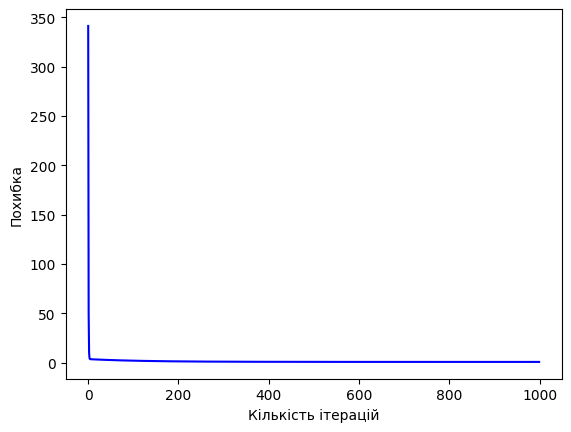

In [75]:
plt.plot(loss_values, color='blue')
plt.xlabel('Кількість ітерацій')
plt.ylabel('Похибка')
plt.show()

4. Порівняйте отримані результати з результатами попереднього завдання

Початкові параметри: k = 2.5, b = 5
Оцінка параметрів за методом найменших квадратів: k = 2.634751148276863, b = 4.198919019458124
Оцінка параметрів з np.polyfit: k = 2.63475114827686, b = 4.198919019458129
Оцінка параметрів за методом градієнтного спуску: k = 2.644297797454922, b = 4.139647753728583


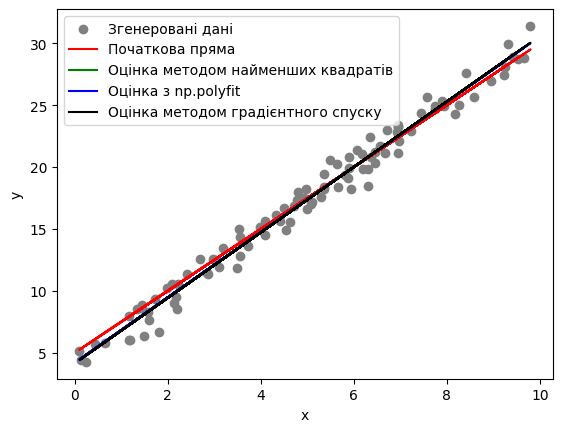

In [76]:
print(f"Початкові параметри: k = {k}, b = {b}")
print(f"Оцінка параметрів за методом найменших квадратів: k = {k_}, b = {b_}")
print(f"Оцінка параметрів з np.polyfit: k = {k_polyfit}, b = {b_polyfit}")
print(f"Оцінка параметрів за методом градієнтного спуску: k = {k_d}, b = {b_d}")
plt.scatter(x, y, color='gray', label='Згенеровані дані')
plt.plot(x, k*x+b, color='red', label='Початкова пряма')
plt.plot(x, k_*x+b_, color='green', label='Оцінка методом найменших квадратів')
plt.plot(x, k_polyfit*x+b_polyfit, color='blue', label='Оцінка з np.polyfit')
plt.plot(x, k_d*x+b_d, color='black', label='Оцінка методом градієнтного спуску')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()